# DBT and DM experiment
Below results for DBT and DM experiments trained on real and real+tsynth full dataset for 5000 steps.

Make sure to run: ```python download_scripts/download_results.py --all``` from ```code/``` directory before running this script.

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
sys.path.append(os.path.dirname(os.getcwd())) # add upper code/ directory to path 
from utils_plot import process_results, plot_cone
from utils.eval_utils import dbtex_criteria #, calc_froc, calc_correct_boxes, format_arrays, calc_avg_value
import config_global

First we plotted overall for DBT images

In [2]:
num_readers = 5
root_dir = config_global.dir_global + '/data/results/DBT/'
real_results_paths = [f'{root_dir}/trained_on_real/{i}/result.csv' for i in range(1, num_readers+1)]
mixed_results_paths = [f'{root_dir}/trained_on_real_and_synth/{i}/result.csv' for i in range(1, num_readers+1)]

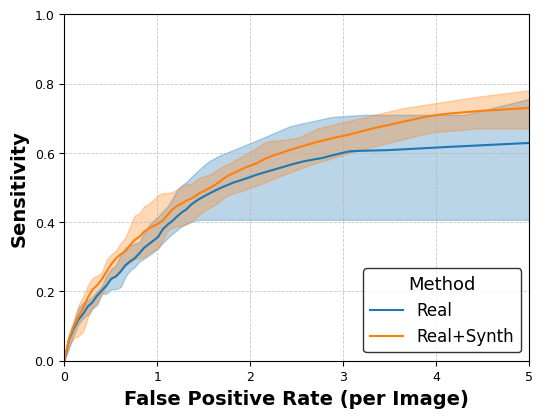

In [4]:

# Average false positive rate
avg_fpr = np.linspace(0, 5, 100)
use_precision = False
bd=None

real_tpr_list = []
mixed_tpr_list = []
for real_result_path, mixed_result_path in zip(real_results_paths, mixed_results_paths):
    tpr_real = process_results(real_result_path, dbtex_criteria, avg_fpr, use_precision=use_precision)
    real_tpr_list.append(tpr_real)

    tpr_mixed = process_results(mixed_result_path, dbtex_criteria, avg_fpr, use_precision=use_precision)
    mixed_tpr_list.append(tpr_mixed)


# Define figure size to fit single-column layout in a two-column format
fig, ax = plt.subplots(figsize=(6, 4.5))

# Define colors for better visibility and differentiation
colors = ['#1f77b4', '#ff7f0e']  # Blue, Orange (color-blind friendly options)

# Plot the cones with improved colors and transparency
plot_cone(ax, avg_fpr, real_tpr_list, color=colors[0], label='Real', linewidth=1.5)
plot_cone(ax, avg_fpr, mixed_tpr_list, color=colors[1], label='Real+Synth', linewidth=1.5)

# Set axis labels with improved font settings
ax.set_xlabel('False Positive Rate (per Image)', fontsize=14, fontweight='bold')
ax.set_ylabel('Sensitivity', fontsize=14, fontweight='bold')

# Set grid with improved visibility
ax.grid(linestyle='--', alpha=0.7, linewidth=0.6)

# Set axis limits
ax.set_ylim([0, 1])
ax.set_xlim([min(avg_fpr), max(avg_fpr)])

# Customize tick labels for clarity
ax.tick_params(axis='both', labelsize=9)

# Add legend with enhanced styling
legend = plt.legend(title="Method", fontsize=12, title_fontsize=13, loc='lower right', frameon=True)
legend.get_frame().set_edgecolor('black')

# Save figure for high-resolution submission
# plt.savefig('froc_DBT.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


Then we separated DBT results by breast density 

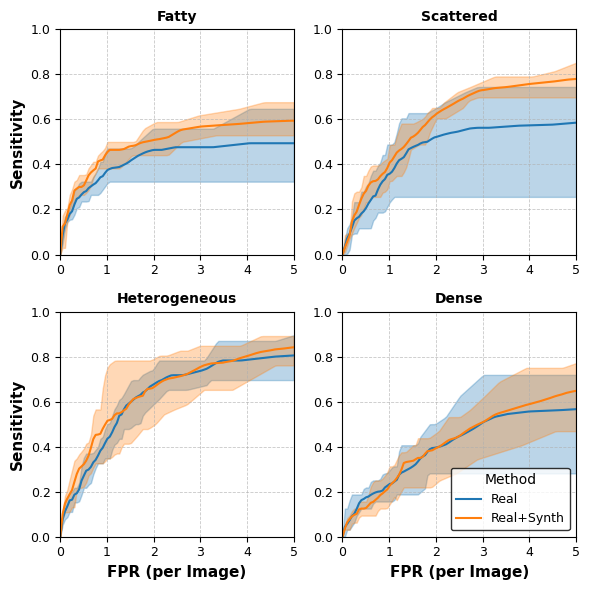

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6))

bd_values = [1, 2, 3, 4]
bd_labels = ['Fatty', 'Scattered', 'Heterogeneous', 'Dense']


# Loop through each subplot (one for each fpr value)
for ax, bd, bd_label in zip(axs.flatten(), bd_values, bd_labels):
    real_tpr_list = []
    mixed_tpr_list = []
    for real_result_path, mixed_result_path in zip(real_results_paths, mixed_results_paths):
        # Real name processing
        tpr_real = process_results(real_result_path, dbtex_criteria, avg_fpr, use_precision=use_precision,
                                   filter_dict={'breast_density': bd})
        real_tpr_list.append(tpr_real)

        # Mixed name processing
        tpr_mixed = process_results(mixed_result_path, dbtex_criteria, avg_fpr, use_precision=use_precision,
                                    filter_dict={'breast_density': bd})
        mixed_tpr_list.append(tpr_mixed)
    
    plot_cone(ax, avg_fpr, real_tpr_list, color=colors[0], label='Real', linewidth=1.5)
    plot_cone(ax, avg_fpr, mixed_tpr_list, color=colors[1], label='Real+Synth', linewidth=1.5)

    # Set grid with improved visibility
    ax.grid(linestyle='--', alpha=0.7, linewidth=0.6)
    ax.set_title(bd_label, fontsize=10, fontweight='bold')
    ax.set_ylim([0, 1]) 
    ax.set_xlim([min(avg_fpr), max(avg_fpr)])
# Customize tick labels for clarity
    ax.tick_params(axis='both', labelsize=9) 

# Adjust the layout for better spacing
axs[1,0].set_xlabel('FPR (per Image)', fontsize=11, fontweight='bold')
axs[1,1].set_xlabel('FPR (per Image)', fontsize=11, fontweight='bold')
axs[0,0].set_ylabel('Sensitivity', fontsize=11, fontweight='bold')
axs[1,0].set_ylabel('Sensitivity', fontsize=11, fontweight='bold')

# Set axis labels with improved font settings
legend = axs[1,1].legend(title="Method", fontsize=9, title_fontsize=10, loc='lower right', frameon=True)
legend.get_frame().set_edgecolor('black')
plt.tight_layout()
# Save figure for high-resolution submission
# plt.savefig('froc_DBT_bd.png', bbox_inches='tight', dpi=300)
plt.show()

### Below DM overall results sun for 5000 steps

In [6]:
num_readers = 5
root_dir = config_global.dir_global + '/data/results/DM/'
real_results_paths = [f'{root_dir}/trained_on_real/{i}/result.csv' for i in range(1, num_readers+1)]
mixed_results_paths = [f'{root_dir}/trained_on_real_and_synth/{i}/result.csv' for i in range(1, num_readers+1)]

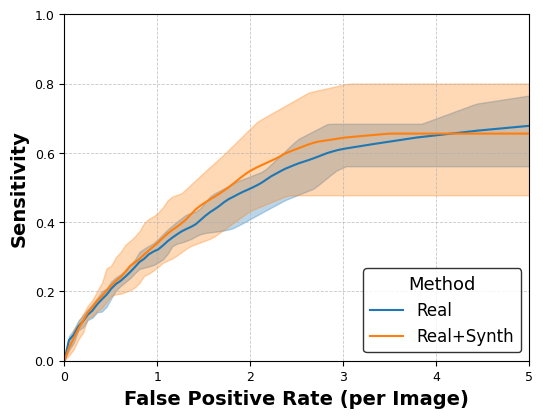

In [7]:

# Average false positive rate
avg_fpr = np.linspace(0, 5, 100)
use_precision = False
bd=None

real_tpr_list = []
mixed_tpr_list = []
for real_result_path, mixed_result_path in zip(real_results_paths, mixed_results_paths):
    tpr_real = process_results(real_result_path, dbtex_criteria, avg_fpr, use_precision=use_precision)
    real_tpr_list.append(tpr_real)

    tpr_mixed = process_results(mixed_result_path, dbtex_criteria, avg_fpr, use_precision=use_precision)
    mixed_tpr_list.append(tpr_mixed)


# Define figure size to fit single-column layout in a two-column format
fig, ax = plt.subplots(figsize=(6, 4.5))

# Define colors for better visibility and differentiation
colors = ['#1f77b4', '#ff7f0e']  # Blue, Orange (color-blind friendly options)

# Plot the cones with improved colors and transparency
plot_cone(ax, avg_fpr, real_tpr_list, color=colors[0], label='Real', linewidth=1.5)
plot_cone(ax, avg_fpr, mixed_tpr_list, color=colors[1], label='Real+Synth', linewidth=1.5)

# Set axis labels with improved font settings
ax.set_xlabel('False Positive Rate (per Image)', fontsize=14, fontweight='bold')
ax.set_ylabel('Sensitivity', fontsize=14, fontweight='bold')

# Set grid with improved visibility
ax.grid(linestyle='--', alpha=0.7, linewidth=0.6)

# Set axis limits
ax.set_ylim([0, 1])
ax.set_xlim([min(avg_fpr), max(avg_fpr)])

# Customize tick labels for clarity
ax.tick_params(axis='both', labelsize=9)

# Add legend with enhanced styling
legend = plt.legend(title="Method", fontsize=12, title_fontsize=13, loc='lower right', frameon=True)
legend.get_frame().set_edgecolor('black')

# Save figure for high-resolution submission
# plt.savefig('froc_DM.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


### DM results separated by breast density

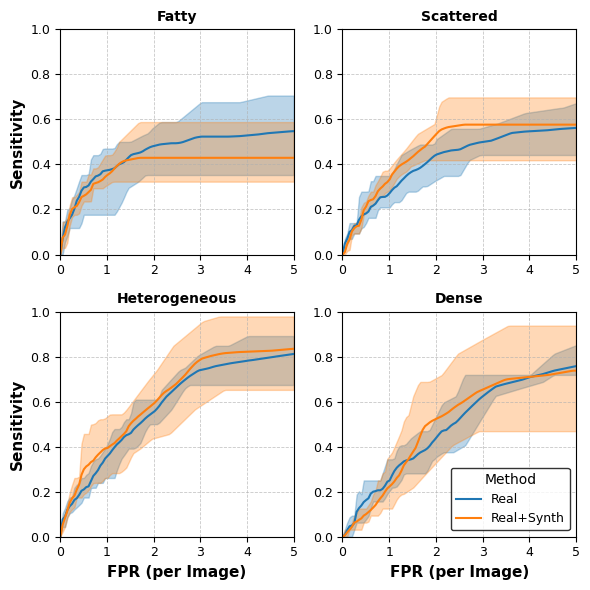

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6))

bd_values = [1, 2, 3, 4]
bd_labels = ['Fatty', 'Scattered', 'Heterogeneous', 'Dense']


# Loop through each subplot (one for each fpr value)
for ax, bd, bd_label in zip(axs.flatten(), bd_values, bd_labels):
    real_tpr_list = []
    mixed_tpr_list = []
    for real_result_path, mixed_result_path in zip(real_results_paths, mixed_results_paths):
        # Real name processing
        tpr_real = process_results(real_result_path, dbtex_criteria, avg_fpr, use_precision=use_precision,
                                   filter_dict={'breast_density': bd})
        real_tpr_list.append(tpr_real)

        # Mixed name processing
        tpr_mixed = process_results(mixed_result_path, dbtex_criteria, avg_fpr, use_precision=use_precision,
                                    filter_dict={'breast_density': bd})
        mixed_tpr_list.append(tpr_mixed)
    
    plot_cone(ax, avg_fpr, real_tpr_list, color=colors[0], label='Real', linewidth=1.5)
    plot_cone(ax, avg_fpr, mixed_tpr_list, color=colors[1], label='Real+Synth', linewidth=1.5)

    # Set grid with improved visibility
    ax.grid(linestyle='--', alpha=0.7, linewidth=0.6)
    ax.set_title(bd_label, fontsize=10, fontweight='bold')
    ax.set_ylim([0, 1]) 
    ax.set_xlim([min(avg_fpr), max(avg_fpr)])
# Customize tick labels for clarity
    ax.tick_params(axis='both', labelsize=9) 

# Adjust the layout for better spacing
axs[1,0].set_xlabel('FPR (per Image)', fontsize=11, fontweight='bold')
axs[1,1].set_xlabel('FPR (per Image)', fontsize=11, fontweight='bold')
axs[0,0].set_ylabel('Sensitivity', fontsize=11, fontweight='bold')
axs[1,0].set_ylabel('Sensitivity', fontsize=11, fontweight='bold')

# Set axis labels with improved font settings
legend = axs[1,1].legend(title="Method", fontsize=9, title_fontsize=10, loc='lower right', frameon=True)
legend.get_frame().set_edgecolor('black')
plt.tight_layout()
# Save figure for high-resolution submission
# plt.savefig('froc_DM_bd.png', bbox_inches='tight', dpi=300)
plt.show()